# Data Science and Business Analytics (GRIP June 2021)

# Task 4 : Exploratory Data Analysis - Terrorism

# Author : Paras Nitin Shah

# Problem Statement : Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’. As a security/defense analyst, try to find out the hot zone of terrorism.

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the data into a data frame and reading the data
dataset = pd.read_csv("globalterrorism.csv")
dataset.drop(dataset.columns[[4, 6, 31, 33, 61, 62, 63, 76, 79, 90, 92, 94, 96, 114, 115, 121]], axis=1, inplace=True)
dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
dataset.tail()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,Middle Shebelle,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,0,200,Syria,10,Middle East & North Africa,Lattakia,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,0,92,India,6,South Asia,Manipur,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,0,160,Philippines,5,Southeast Asia,Maguindanao,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 119 entries, eventid to related
dtypes: float64(55), int64(22), object(42)
memory usage: 165.0+ MB


In [5]:
dataset.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
dataset.count()

eventid     181691
iyear       181691
imonth      181691
iday        181691
extended    181691
             ...  
INT_LOG     181691
INT_IDEO    181691
INT_MISC    181691
INT_ANY     181691
related      25038
Length: 119, dtype: int64

In [7]:
dataset.nunique()

eventid     181691
iyear           47
imonth          13
iday            32
extended         2
             ...  
INT_LOG          3
INT_IDEO         3
INT_MISC         3
INT_ANY          3
related      14306
Length: 119, dtype: int64

In [8]:
#Removing duplicates if any.
dataset.shape

(181691, 119)

In [9]:
dataset = dataset.drop_duplicates()
dataset.shape

(181691, 119)

## Exploratory Data Analysis (EDA) and Data Visualization

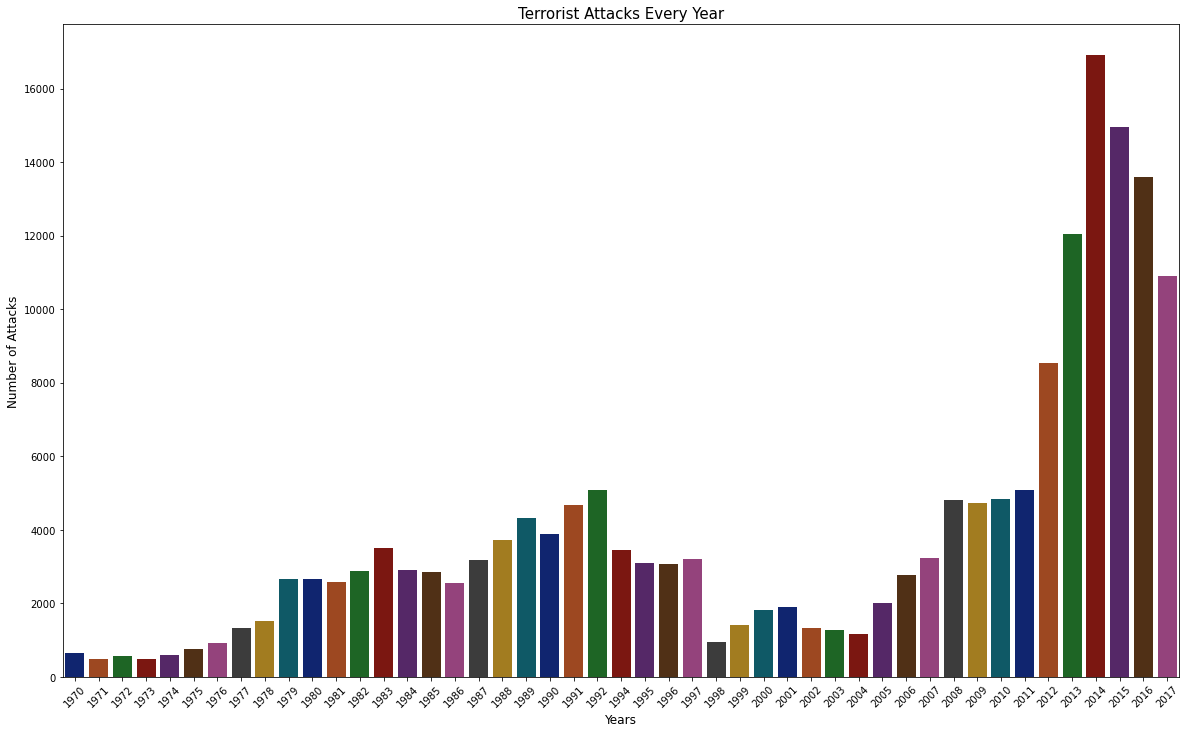

In [10]:
#Terrorist attacks every year
years = dataset['iyear'].unique()
count_years = dataset['iyear'].value_counts().sort_index()
plt.figure(figsize=(20,12))
sns.barplot(x=years, y=count_years, palette="dark")
plt.title("Terrorist Attacks Every Year", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Number of Attacks", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [11]:
#Region-wise number of attacks
dataset.region_txt.value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

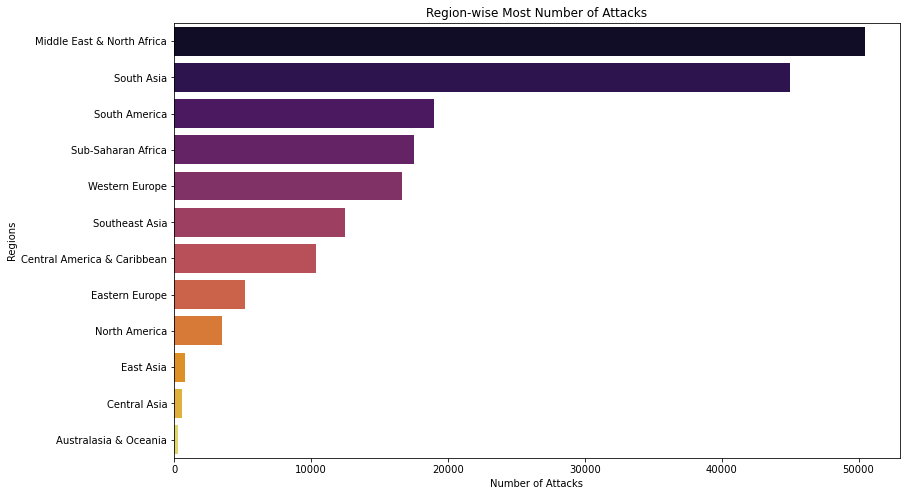

In [12]:
plt.figure(figsize=(13,8))
sns.barplot(y=dataset['region_txt'].value_counts().index, x=dataset['region_txt'].value_counts().values, palette='inferno')
plt.title("Region-wise Most Number of Attacks")
plt.xlabel("Number of Attacks")
plt.ylabel("Regions")
plt.show()

In [13]:
#Country-wise number of attacks
dataset.country_txt.value_counts()[:10]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: country_txt, dtype: int64

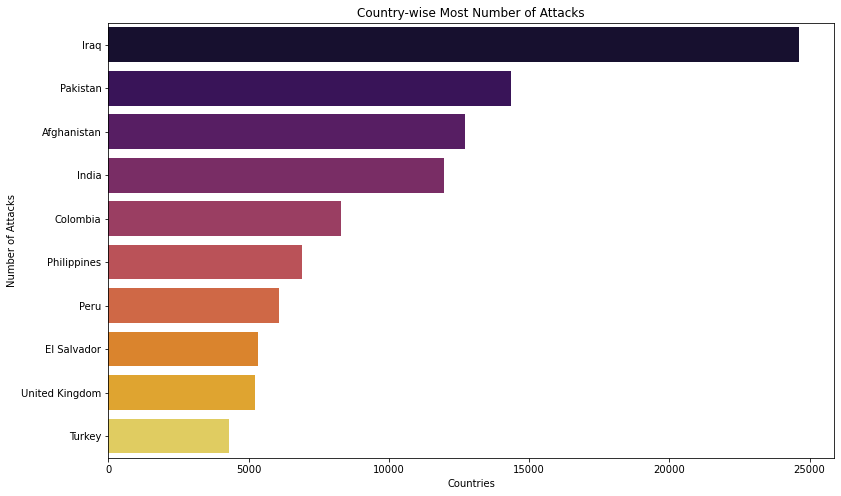

In [14]:
plt.figure(figsize=(13,8))
sns.barplot(y=dataset['country_txt'].value_counts()[:10].index, x=dataset['country_txt'].value_counts()[:10].values, 
            palette='inferno')
plt.title("Country-wise Most Number of Attacks")
plt.xlabel("Countries")
plt.ylabel("Number of Attacks")
plt.show()

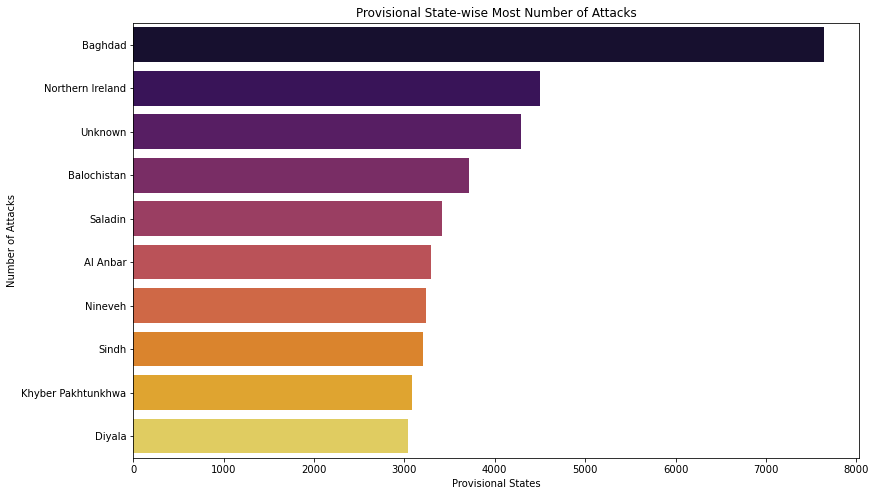

In [15]:
#Provisional State-wise number of attacks
plt.figure(figsize=(13,8))
sns.barplot(y=dataset['provstate'].value_counts()[:10].index, x=dataset['provstate'].value_counts()[:10].values, 
            palette='inferno')
plt.title("Provisional State-wise Most Number of Attacks")
plt.xlabel("Provisional States")
plt.ylabel("Number of Attacks")
plt.show()

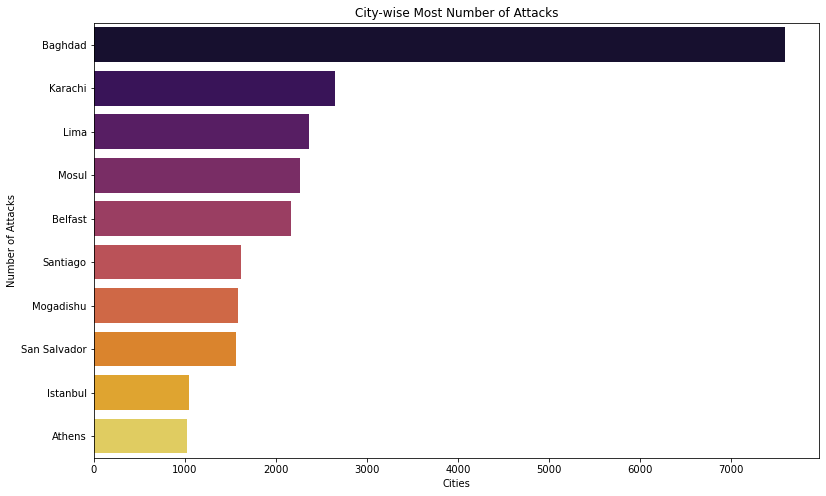

In [16]:
#City-wise number of attacks
plt.figure(figsize=(13,8))
sns.barplot(y=dataset['city'].value_counts()[1:11].index, x=dataset['city'].value_counts()[1:11].values, 
            palette='inferno')
plt.title("City-wise Most Number of Attacks")
plt.xlabel("Cities")
plt.ylabel("Number of Attacks")
plt.show()

In [17]:
#Most Kills by a Terrorist Group
gname_values = dataset.gname.value_counts()[:10]
gname_values

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: gname, dtype: int64

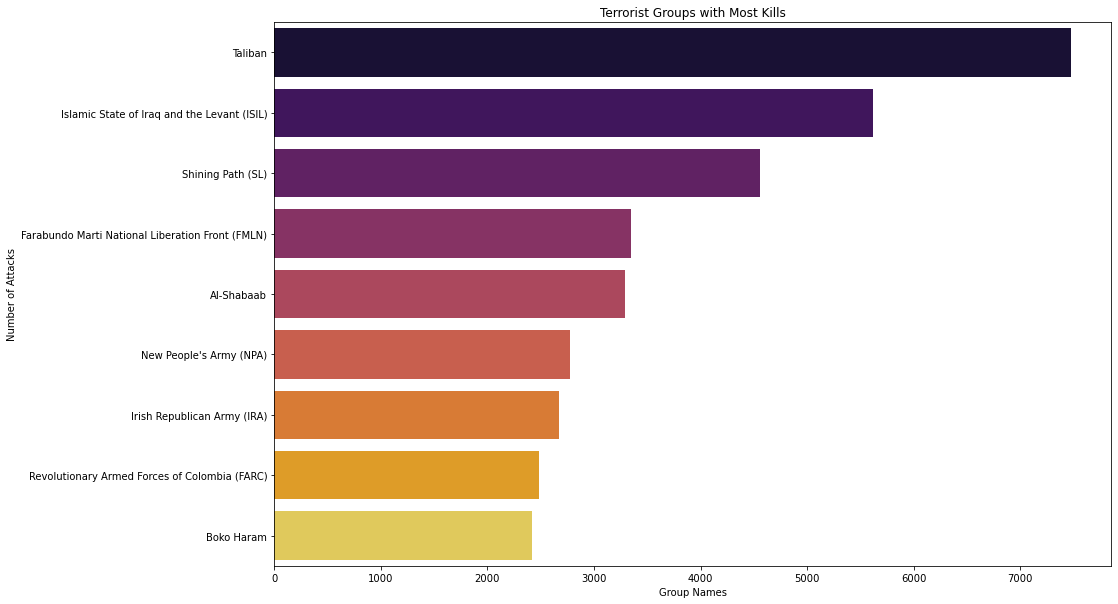

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(y=gname_values[1:].index, x=gname_values[1:].values, palette='inferno')
plt.title("Terrorist Groups with Most Kills")
plt.xlabel("Group Names")
plt.ylabel("Number of Attacks")
plt.show()

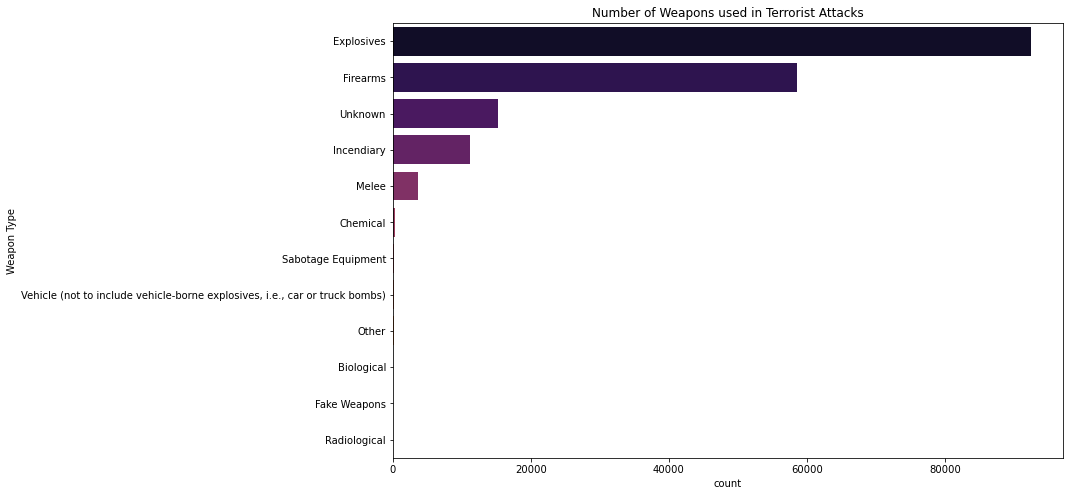

In [19]:
#Most used Weapon in Terrorist Attacks
plt.figure(figsize=(12,8))
sns.countplot(y='weaptype1_txt', data=dataset, palette='inferno', order=dataset['weaptype1_txt'].value_counts().index)
plt.title("Number of Weapons used in Terrorist Attacks")
plt.ylabel("Weapon Type")
plt.show()

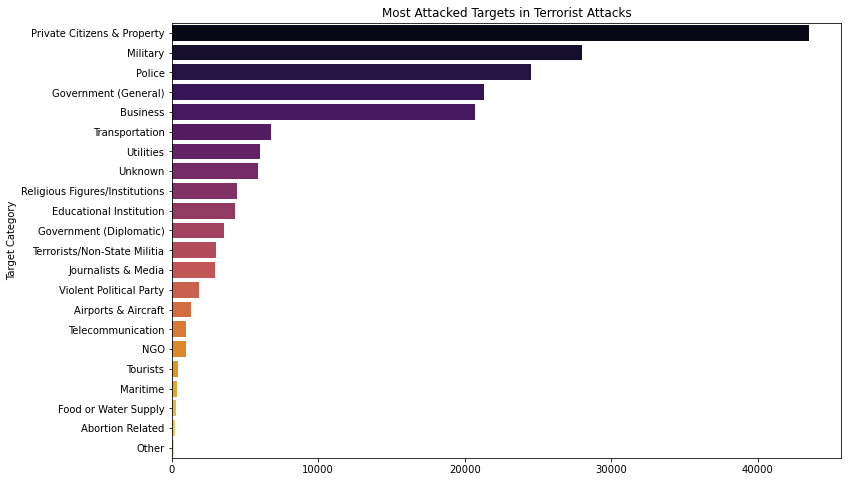

In [20]:
#Most Attacked Targets in Terrorist Attacks
plt.figure(figsize=(12,8))
sns.barplot(y=dataset['targtype1_txt'].value_counts().index,x=dataset['targtype1_txt'].value_counts().values, palette='inferno')
plt.title("Most Attacked Targets in Terrorist Attacks")
plt.ylabel("Target Category")
plt.show()

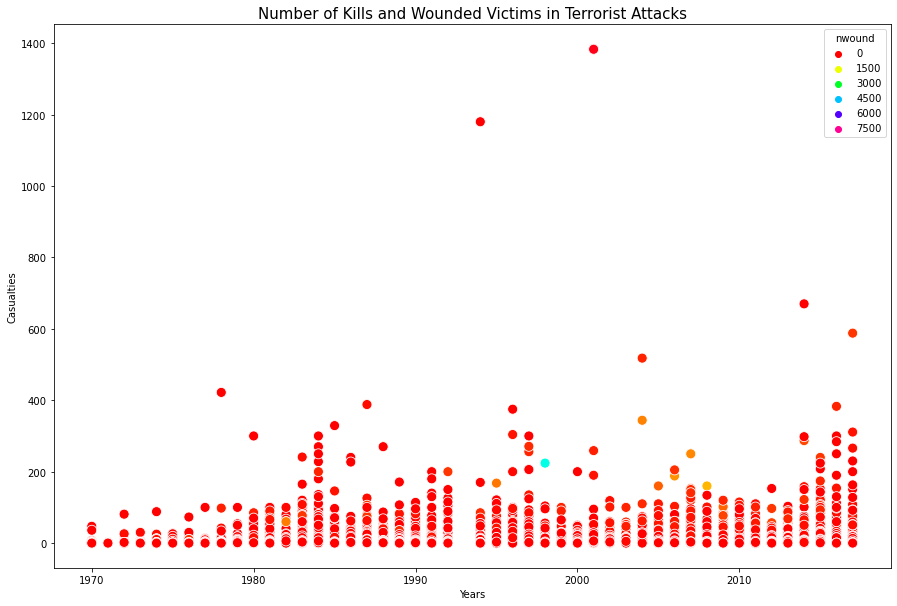

In [21]:
#Casualties in Terrorist Attacks
plt.figure(figsize=(15,10))
sns.scatterplot(data=dataset, x='iyear', y='nkill', hue='nwound',palette='hsv', s=100)
plt.title("Number of Kills and Wounded Victims in Terrorist Attacks", fontsize=15)
plt.xlabel("Years")
plt.ylabel("Casualties")
plt.show()

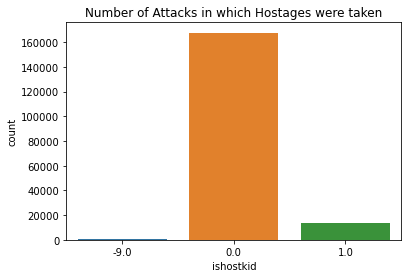

In [22]:
#Hostages taken in Terrorist Attacks
sns.countplot(x=dataset['ishostkid'])
plt.title("Number of Attacks in which Hostages were taken")
plt.show()

## Analysis Report

### 01. The year 2014 witnessed the most number of terrorist attacks.
### 02. The Region that witnessed the most number of terrorist attacks = Middle East & North Africa
### 03. The Country that witnessed the most number of terrorist attacks = Iraq
### 04. The Provisional State that witnessed the most number of terrorist attacks = Baghdad
### 05. The City that witnesssed the most number of terrorist attacks = Baghdad
### 06. The terrorist group with most kills = Taliban
### 07. Most used weapon for the terrorist attacks = Explosives
### 08. Most attacked targets in the terrorist attacks = Private Citizens & Property
### 09. Number of People killed in the terrorist attacks = 411868
### 10. There are over 1,60,000 terrorist attacks in which Hostages were taken.
### 11. In the recent years, the frequency of the terrorist attacks has increased drastically.